In [ ]:
# Ріжко М. КН-308 2 4.1

In [1]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

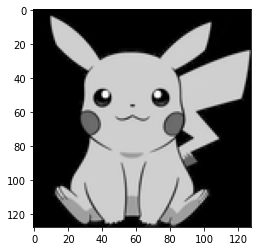

In [24]:
img = cv2.imread('img/pikachu.png', 0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

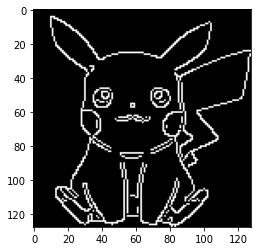

In [25]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

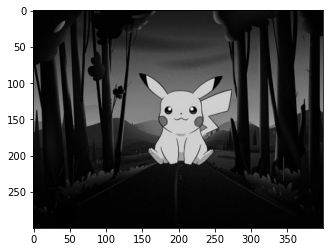

In [26]:
img1 = cv2.imread('img/img1.jpg', 0)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

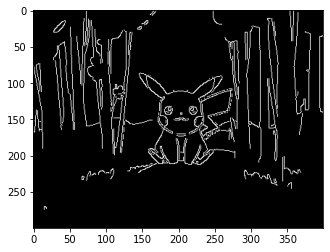

In [27]:
edges1 = cv2.Canny(img1, 100, 200)
plt.imshow(cv2.cvtColor(edges1, cv2.COLOR_BGR2RGB))

In [28]:
edges1.shape[0] * edges1.shape[1]

120000

In [29]:
def manhatten(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1]) 

In [30]:
def find_255(edges):
    coords = []
    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            if edges[i][j] == 255:
                coords.append((i, j))
    return coords

In [31]:
coords = find_255(edges1)
len(coords)

6620

In [32]:
def find_distances(edges):
    coords = find_255(edges)
    distances = []
    
    for i in range(edges.shape[0]):
        distance = []
        
        for j in range(edges.shape[1]):
            if edges[i][j] == 255:
                distance.append(0)
            else:
                p1 = (i, j)
                min_d = manhatten(p1, coords[0])
                for el in coords:
                    if manhatten(p1, el) < min_d:
                        min_d = manhatten(p1, el)
                distance.append(min_d)
        distances.append(distance)
    return distances

In [33]:
d = find_distances(edges1)

In [34]:
def search(d, pattern):
    pcoords = find_255(pattern)
    res = [float('inf'), 0, 0]
    for i in range(len(d) - pattern.shape[0]):
        for j in range(len(d[i]) - pattern.shape[1]):
            t = 0
            for el in pcoords:
                t += d[i + el[0]][j + el[1]]
            if t < res[0]:
                res = [t, i, j]
    return res

In [35]:
r = search(d, edges)

In [36]:
r

[173, 86, 146]

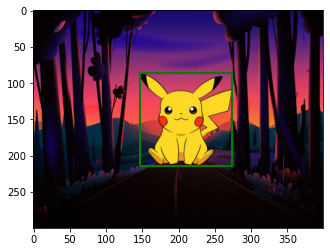

In [37]:
img1 = cv2.imread('img/img1.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

ax = plt.gca()
rect = Rectangle((r[2], r[1]), edges.shape[0], edges.shape[1], linewidth=2, edgecolor='g', facecolor='none')
ax.add_patch(rect)

In [38]:
def find_pikachu(path):
    img = cv2.imread('img/pikachu.png', 0)
    edges = cv2.Canny(img, 100, 200)
    img1 = cv2.imread(path, 0)
    edges1 = cv2.Canny(img1, 100, 200)
    
    d = find_distances(edges1)
    r = search(d, edges)
    
    img1 = cv2.imread(path)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    rect = Rectangle((r[2], r[1]), edges.shape[0], 
                     edges.shape[1], linewidth=2, 
                     edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    plt.show()

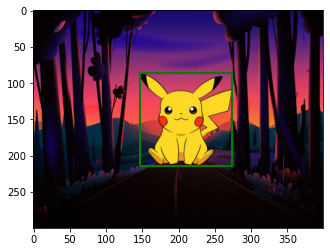

In [39]:
find_pikachu('img/img1.jpg')

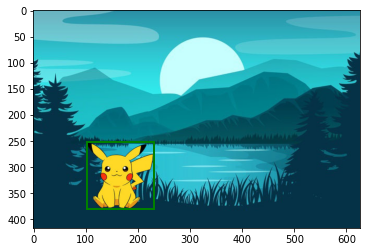

In [40]:
find_pikachu('img/img2.jpg')

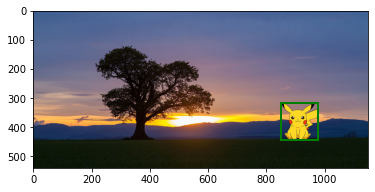

In [41]:
find_pikachu('img/img3.jpg')

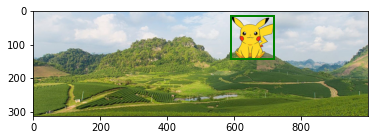

In [42]:
find_pikachu('img/img4.jpg')

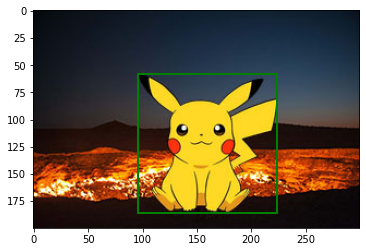

In [43]:
find_pikachu('img/img5.jpg')